In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys, os

In [5]:
import matplotlib as mpl
mpl.rc("font", family = "Arial")
mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42

In [6]:
#Loading obs
current_directory = os.getcwd()
# overwrite obs with the most recent version
filename = current_directory+"/backups/global_umap_obs_86447x39_250214_17h31.npz"
encoding = "latin1"

with np.load(filename, encoding=encoding, allow_pickle = True) as f:
    obs = pd.DataFrame(**f)


In [45]:
len(obs)

86447

In [21]:

aml_cells_order = ["AML cells 1", "AML cells 2", "AML cells 3", "AML cells 4", "AML cells 5", "AML cells 6", "AML cells 7", "AML cells 8", "AML cells 9", "AML cells 10", "AML Monocytes 1", "AML Monocytes 2", "Cycling AML Monocytes", "Cycling AML cells 1", "Cycling AML cells 2"]

aml_cells = obs.copy()
aml_cells["cell_type_sub_prolif_anno"] = aml_cells["cell_type_sub_prolif_anno"].astype('category')
aml_cells = aml_cells[(aml_cells["cell_type_sub_prolif_anno"].str.contains("AML", na = False)) & (aml_cells["sample"] == "UL")]
aml_cells["cell_type_sub_prolif_anno"] = aml_cells["cell_type_sub_prolif_anno"].cat.remove_unused_categories()
aml_cells["cell_type_sub_prolif_anno"] = pd.Categorical(aml_cells["cell_type_sub_prolif_anno"], categories = aml_cells_order, ordered = True)


summary_df = pd.crosstab(index=aml_cells["code_renamed"], columns=aml_cells["cell_type_sub_prolif_anno"])
summary_df.index = summary_df.index.str.replace(r'-\d+', '', regex=True)
normalized_df = summary_df.div(summary_df.sum(axis=1), axis=0)*100


normalized_df_cell_type = summary_df.div(summary_df.sum(axis=0), axis=1)*100

summary_df.sum()




cell_type_sub_prolif_anno
AML cells 1              1563
AML cells 2               324
AML cells 3              1540
AML cells 4              6292
AML cells 5               390
AML cells 6               138
AML cells 7               376
AML cells 8               616
AML cells 9               186
AML cells 10              517
AML Monocytes 1           294
AML Monocytes 2           980
Cycling AML Monocytes      74
Cycling AML cells 1       340
Cycling AML cells 2       381
dtype: int64

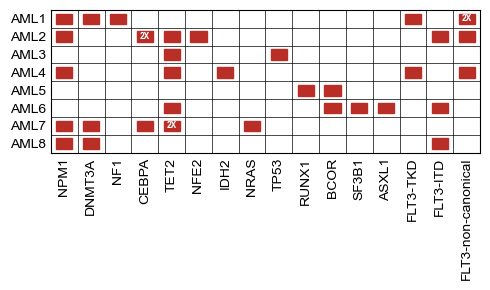

In [106]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data from CSV
file_path = "AML_cohort_genes_2025-01-03.csv"
df = pd.read_csv(file_path, index_col=0)

fig, ax = plt.subplots(figsize=(5, 3))

padding = 0.2 

# plot filled cells and "2X"
for i, row in enumerate(df.itertuples(index=False)):
    for j, value in enumerate(row):
        if value == 1 or value == 2:
            rect = plt.Rectangle((j + padding, i + padding), 
                                 1 - 2 * padding, 1 - 2 * padding, 
                                 color="#b92f28")
            ax.add_patch(rect)
            if value == 2:
                # add bold "2X" text for value 2
                ax.text(j + 0.5, i + 0.5, "2X", 
                        fontsize=6, fontweight='bold', 
                        color='white', ha='center', va='center')

ax.set_xticks(np.arange(len(df.columns)) + 0.5)
ax.set_yticks(np.arange(len(df.index)) + 0.5)
ax.set_xticklabels(df.columns, rotation=90, fontsize=10)
ax.set_yticklabels(df.index, fontsize=10)

ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

ax.set_xticks(np.arange(len(df.columns) + 1), minor=True)
ax.set_yticks(np.arange(len(df.index) + 1), minor=True)
ax.grid(which="minor", color="black", linewidth=0.5)

ax.set_xlim(0, len(df.columns))
ax.set_ylim(0, len(df.index))

ax.invert_yaxis()

plt.tight_layout()
plt.savefig("figures/final/aml_types_mutations_v2.pdf", transparent = True, bbox_inches="tight")



/var/folders/sv/fwsrf8xs57jd9rtwwfxmyxg80000gn/T/ipykernel_6550/1936092058.py:75: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


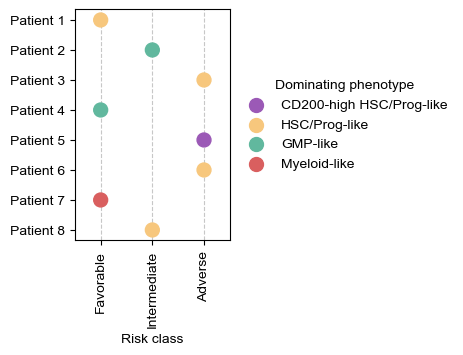

In [6]:
patients = ["Patient 1", "Patient 2", "Patient 3", "Patient 4", "Patient 5", "Patient 6", "Patient 7", "Patient 8"]

risk = ["Favorable", 
             "Intermediate", 
             "Adverse", 
             "Favorable", 
             "Adverse", 
             "Adverse", 
             "Favorable", 
             "Intermediate"]
                 
program = ["HSC/Prog-like", 
           "GMP-like", 
           "HSC/Prog-like",
           "GMP-like",
           "CD200-high HSC/Prog-like",
           "HSC/Prog-like",
           "Myeloid-like",
           "HSC/Prog-like"]

patients_dict = {
    "patients": patients,
    "risk": risk,
    "program": program
}


patients_df = pd.DataFrame(patients_dict)
patients_df = patients_df.rename(columns={"patients": "Patient", 
                                          "risk": "Risk class", 
                                          "program": "Dominating phenotype"})


plt.figure(figsize=(2, 3))


colors = {
    "HSC/Prog-like": "tab:blue",
    "GMP-like": "tab:orange",
    "Myeloid-like": "tab:green",
}

colors = {
    "CD200-high HSC/Prog-like": "#9b59b6", # Purple
    "HSC/Prog-like": "#f7c77d",  # Golden yellow
    "GMP-like": "#61b89e",       # Vibrant soft blue
    "Myeloid-like": "#d95f5f",   # Warm red
}



# Map colors to the Dominating program
color_map = patients_df["Dominating phenotype"].map(colors)


plt.scatter(patients_df["Risk class"], 
            patients_df["Patient"], 
            c=color_map, s=100, alpha=1, zorder = 2)


for program, color in colors.items():
    plt.scatter([], [], c=color, label=program, s=100)

plt.legend(title="Dominating phenotype", loc="center left", bbox_to_anchor=(1, 0.5), frameon=False)
plt.xticks(rotation=90)

plt.xlim(-0.5, len(patients_df["Risk class"].unique()) - 0.5)  # Add padding
plt.xlabel("Risk class")
plt.grid(axis="x", linestyle="--", alpha=0.7, zorder = 0)

plt.gca().invert_yaxis()

plt.tight_layout()
plt.savefig("figures/final/aml_risk_class_v2_with_CD200.pdf", transparent = True, bbox_inches="tight")


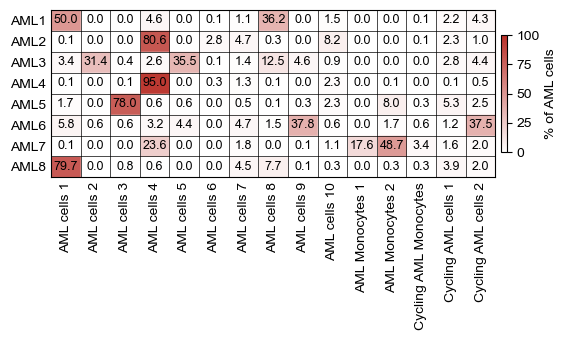

In [61]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(
    name="cmap", 
    colors=[
        "white",
        "#b92f28"
    ]
)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize

df = normalized_df.copy()

norm = Normalize(vmin=0, vmax=100)

fig, ax = plt.subplots(figsize=(6, 3.5))

padding = 0.025

for i, row in enumerate(df.itertuples(index=False)):
    for j, value in enumerate(row):
        color = cmap(norm(value))
        rect = plt.Rectangle((j + padding, i + padding), 
                              1 - 2 * padding, 1 - 2 * padding, 
                              color=color)
        ax.add_patch(rect)
        
        # add text (value) in the center of the rectangle if value >= 0
        if value >= 0:
            ax.text(j + 0.5, i + 0.5, f"{value:.1f}", 
                    ha='center', va='center', fontsize=9, color="black")

ax.set_xticks(np.arange(len(df.columns)) + 0.5)
ax.set_yticks(np.arange(len(df.index)) + 0.5)
ax.set_xticklabels(df.columns, rotation=90, fontsize=10)
ax.set_yticklabels(df.index, fontsize=10)

ax.tick_params(axis='x', which='both', length=0) 
ax.tick_params(axis='y', which='both', length=0)

ax.set_xticks(np.arange(len(df.columns) + 1), minor=True)
ax.set_yticks(np.arange(len(df.index) + 1), minor=True)
ax.grid(which="minor", color="black", linewidth=0.5)

ax.set_xlim(0, len(df.columns))
ax.set_ylim(0, len(df.index))

ax.invert_yaxis()

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([]) 
cbar = plt.colorbar(sm, ax=ax, orientation="vertical", shrink=0.7, pad=0.01)
cbar.set_label("% of AML cells", fontsize=10)

plt.tight_layout()
plt.savefig("figures/final/aml_cell_types_per_patient_v8.pdf", transparent=True, bbox_inches="tight")

normalized_df.to_excel("csv/final/aml_cell_types_per_patient_normalized.xlsx")
summary_df.to_excel("csv/final/aml_cell_types_absolute.xlsx")


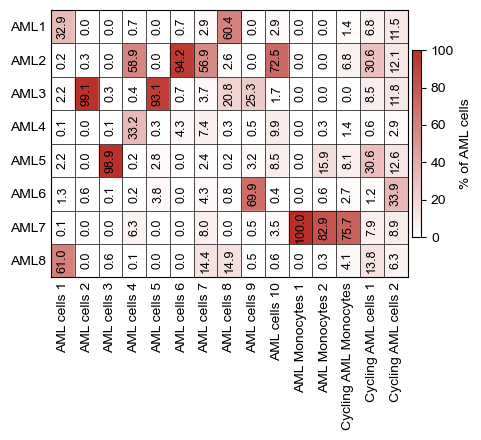

In [62]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(
    name="cmap", 
    colors=[
        "white",
        "#b92f28"
    ]
)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import cm 
from matplotlib.colors import Normalize

df = normalized_df_cell_type.copy()


norm = Normalize(vmin=0, vmax=100)


fig, ax = plt.subplots(figsize=(5, 4.5))

padding = 0.025


for i, row in enumerate(df.itertuples(index=False)):
    for j, value in enumerate(row):
        color = cmap(norm(value)) 
        rect = plt.Rectangle((j + padding, i + padding), 
                              1 - 2 * padding, 1 - 2 * padding, 
                              color=color)
        ax.add_patch(rect)
        

        if value >= 0:
            ax.text(j + 0.5, i + 0.5, f"{value:.1f}", 
                    ha='center', va='center', fontsize=9, color="black", rotation = 90)


ax.set_xticks(np.arange(len(df.columns)) + 0.5) 
ax.set_yticks(np.arange(len(df.index)) + 0.5)
ax.set_xticklabels(df.columns, rotation=90, fontsize=10)
ax.set_yticklabels(df.index, fontsize=10)

ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

ax.set_xticks(np.arange(len(df.columns) + 1), minor=True)
ax.set_yticks(np.arange(len(df.index) + 1), minor=True)
ax.grid(which="minor", color="black", linewidth=0.5)

ax.set_xlim(0, len(df.columns))
ax.set_ylim(0, len(df.index))

ax.invert_yaxis()

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([]) 
cbar = plt.colorbar(sm, ax=ax, orientation="vertical", shrink=0.7, pad=0.01)
cbar.set_label("% of AML cells", fontsize=10)

plt.tight_layout()
plt.savefig("figures/final/aml_cell_types_per_cell_type_v3.pdf", transparent=True, bbox_inches="tight")

normalized_df_cell_type.to_excel("csv/final/aml_cell_types_per_cell_type_normalized.xlsx")


